In [1]:
#Random forest implementation:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 

In [2]:
data=pd.read_csv("bank.csv")

In [3]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
data['target']=np.where(data['default']=='no',0,1)

In [5]:
data['target'].mean()

0.0150510661171833

In [6]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
target        int64
dtype: object

In [7]:
data.shape

(11162, 18)

In [8]:
col_num= ['age','balance','day','duration','campaign','pdays','previous']
col_char=['job','marital','loan','deposit','education','housing','contact','month','poutcome']

In [9]:
X_char_dum = pd.get_dummies(data[col_char], drop_first = True)

In [10]:
X_data_fin=pd.concat([data[col_num],X_char_dum],axis=1, join='inner')

In [11]:
x=X_data_fin
y=data['target']
X=data[col_num]

In [12]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
X_binned=pd.DataFrame(discrete.fit_transform(X),index=X.index, columns=X.columns).add_suffix('_Rank')

/Users/harshithachandrareddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
/Users/harshithachandrareddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
/Users/harshithachandrareddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 6 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '


In [13]:
X_bin_combined=pd.concat([y,X_binned],axis=1,join='inner')


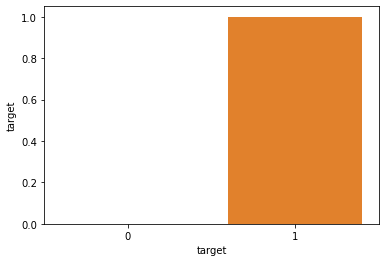

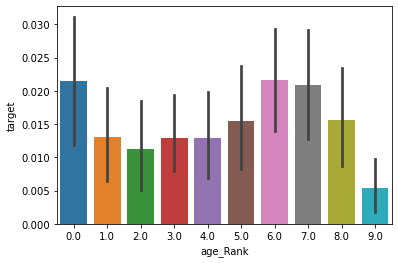

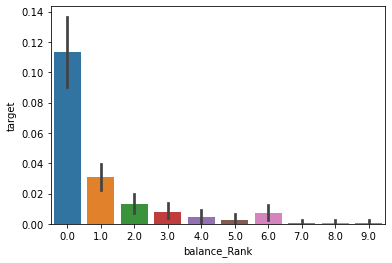

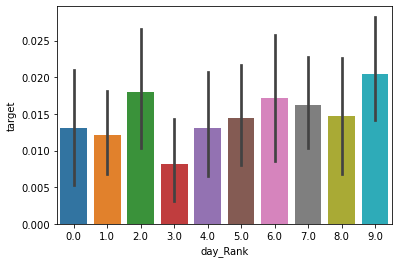

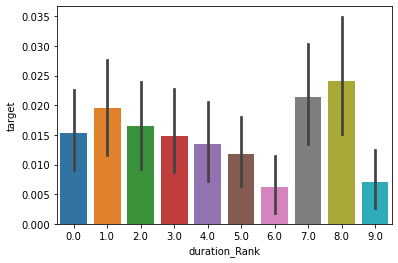

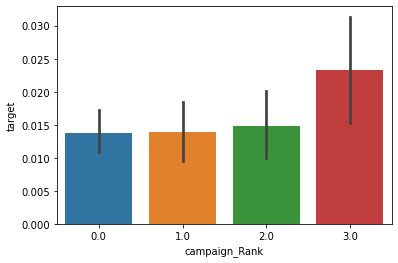

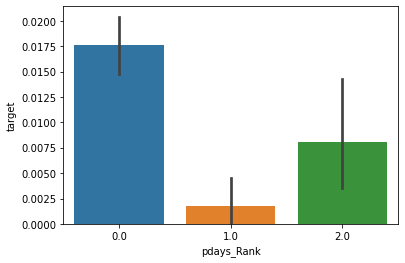

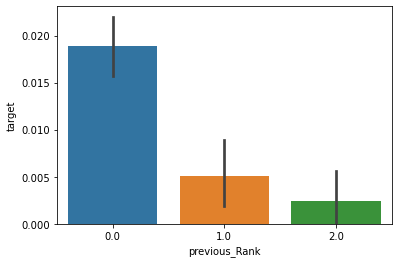

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
for col in (X_bin_combined.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

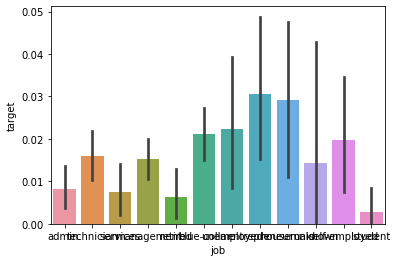

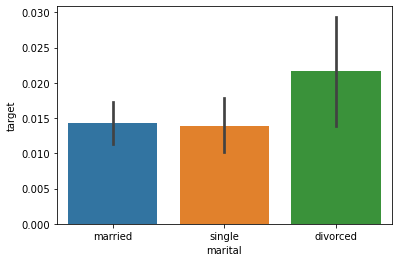

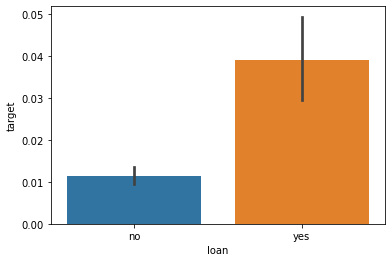

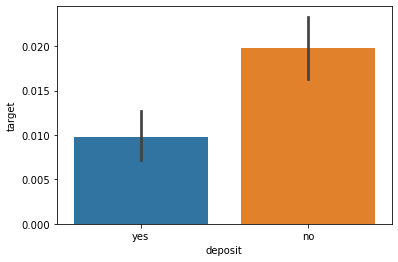

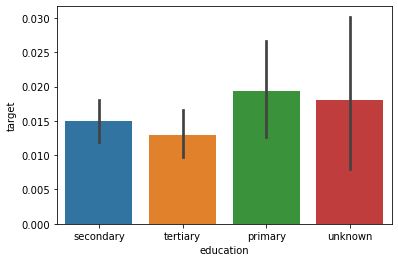

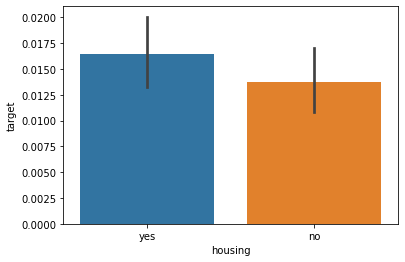

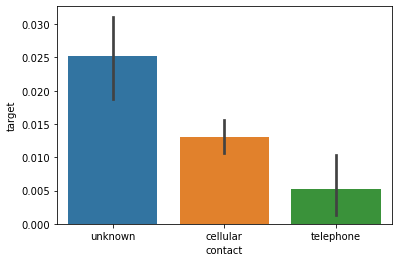

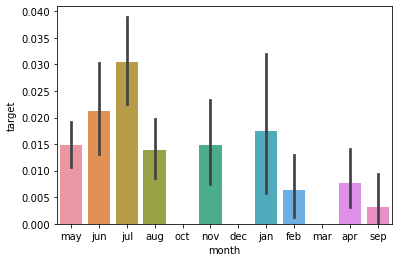

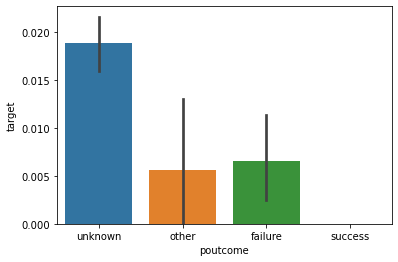

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char=data[col_char]
X_char_merged=pd.concat([y,X_char],axis=1,join='inner')

from numpy import mean
for col in (X_char.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

In [16]:
x.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [17]:
#Fit the model:
fit_rf = RandomForestClassifier(random_state=0)

In [18]:
# train test split of the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.3)

In [19]:
np.random.seed(44)

param_dist = {'max_depth': [3, 5, 6, 7],
              'min_samples_split': [10, 20, 30, 40],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train,y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 10}


In [20]:
# Random Forest with 1000 estimators
rf_1000 = RandomForestClassifier(n_estimators=200,
                  random_state=2,
                  criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 2)
rf_1000.fit(x_train, y_train)
rf_1000_score_train = rf_1000.score(x_train, y_train)
print("Training score: ",rf_1000_score_train)
rf_1000_score_test = rf_1000.score(x_test, y_test)
print("Testing score: ",rf_1000_score_test)

Training score:  0.9861768846793805
Testing score:  0.9820842042400717


In [21]:
# Random Forest with 400 estimators
rf_400 = RandomForestClassifier(n_estimators=400,
                  bootstrap=True,
                  random_state=2,
                  criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 5)
rf_400.fit(x_train, y_train)
rf_400_score_train = rf_400.score(x_train, y_train)
print("Training score: ",rf_400_score_train)
rf_400_score_test = rf_400.score(x_test, y_test)
print("Testing score: ",rf_400_score_test)

Training score:  0.9861768846793805
Testing score:  0.9820842042400717


In [22]:
# Random Forest with 800 estimators
rf_800 = RandomForestClassifier(n_estimators=800,
                  bootstrap=True,              
                  random_state=2,
                  criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 2)
rf_800.fit(x_train, y_train)
rf_800_score_train = rf_800.score(x_train, y_train)
print("Training score: ",rf_800_score_train)
rf_800_score_test = rf_800.score(x_test, y_test)
print("Testing score: ",rf_800_score_test)

Training score:  0.9861768846793805
Testing score:  0.9820842042400717


In [23]:
import pandas as pd
feature_importances=pd.DataFrame(rf_400.feature_importances_,
                                 index=x_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)

In [24]:
feature_importances

,importance
balance,0.378537
duration,0.076354
campaign,0.070970
age,0.068797
day,0.052195
loan_yes,0.042586
pdays,0.027797
contact_unknown,0.023900
job_housemaid,0.020660
month_jul,0.020483


In [26]:
y_pred_tree=rf_400.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_tree)
print(confusion_matrix)

[[3289    0]
 [  60    0]]


In [28]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3289
           1       0.00      0.00      0.00        60

    accuracy                           0.98      3349
   macro avg       0.49      0.50      0.50      3349
weighted avg       0.96      0.98      0.97      3349



/Users/harshithachandrareddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


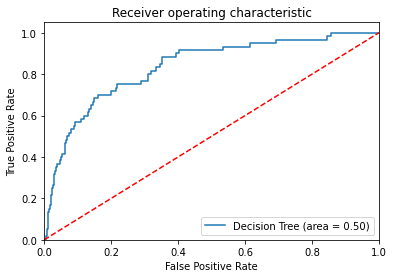

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
tree_roc_auc=roc_auc_score(y_test, rf_400.predict(x_test))

fpr, tpr, thresholds = roc_curve(y_test, rf_400.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [33]:
y_pred_prob = rf_400.predict_proba(x)[:, 1]
data['y_pred_P']=pd.DataFrame(y_pred_prob)
data['P_Rank']=pd.qcut(data['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
data.groupby('P_Rank')['target'].mean()

P_Rank
1     0.000000
2     0.001792
3     0.000000
4     0.001792
5     0.000896
6     0.000896
7     0.008961
8     0.007168
9     0.019713
10    0.109221
Name: target, dtype: float64